## PID-05
        Harsimran Singh Dhillon(BEA-17)
        Himanshu Garud(BEA-18)
        Ojas Ahire(BEA-19)
        Aniruddha Kulkarni(BEA-20)

# Grocery Basket Analysis and Prediction

In [51]:
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import squarify
import seaborn as sns
from wordcloud import WordCloud
import networkx as nx

# for market basket analysis
from mlxtend.frequent_patterns import apriori, association_rules,


**Reading the dataset**

In [52]:
data = pd.read_csv('Basket_Analysis.csv', header = None)
# let's check the shape of the dataset
data.shape

(7501, 20)

In [53]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualizations

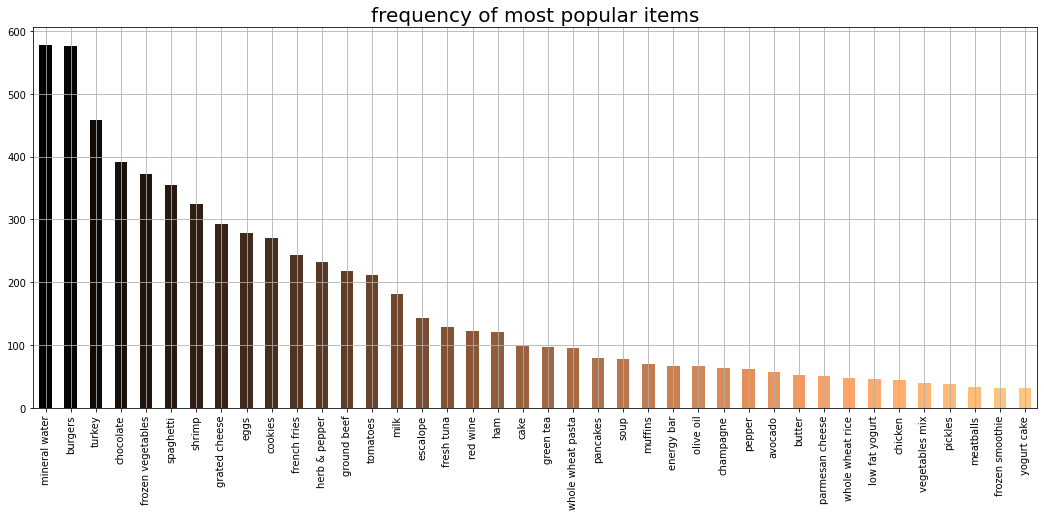

In [56]:
# looking at the frequency of most popular items 
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [57]:
y = data[0].value_counts().head(50).to_frame()
y.index

Index(['mineral water', 'burgers', 'turkey', 'chocolate', 'frozen vegetables',
       'spaghetti', 'shrimp', 'grated cheese', 'eggs', 'cookies',
       'french fries', 'herb & pepper', 'ground beef', 'tomatoes', 'milk',
       'escalope', 'fresh tuna', 'red wine', 'ham', 'cake', 'green tea',
       'whole wheat pasta', 'pancakes', 'soup', 'muffins', 'energy bar',
       'olive oil', 'champagne', 'pepper', 'avocado', 'butter',
       'parmesan cheese', 'whole wheat rice', 'low fat yogurt', 'chicken',
       'vegetables mix', 'pickles', 'meatballs', 'frozen smoothie',
       'yogurt cake', 'salmon', 'dessert wine', 'hot dogs', 'honey', 'cereals',
       'candy bars', 'strawberries', 'oil', 'tomato sauce', 'yams'],
      dtype='object')

In [83]:
data['food'] = 'Food'
food = data.truncate(before = -1, after = 10)

food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

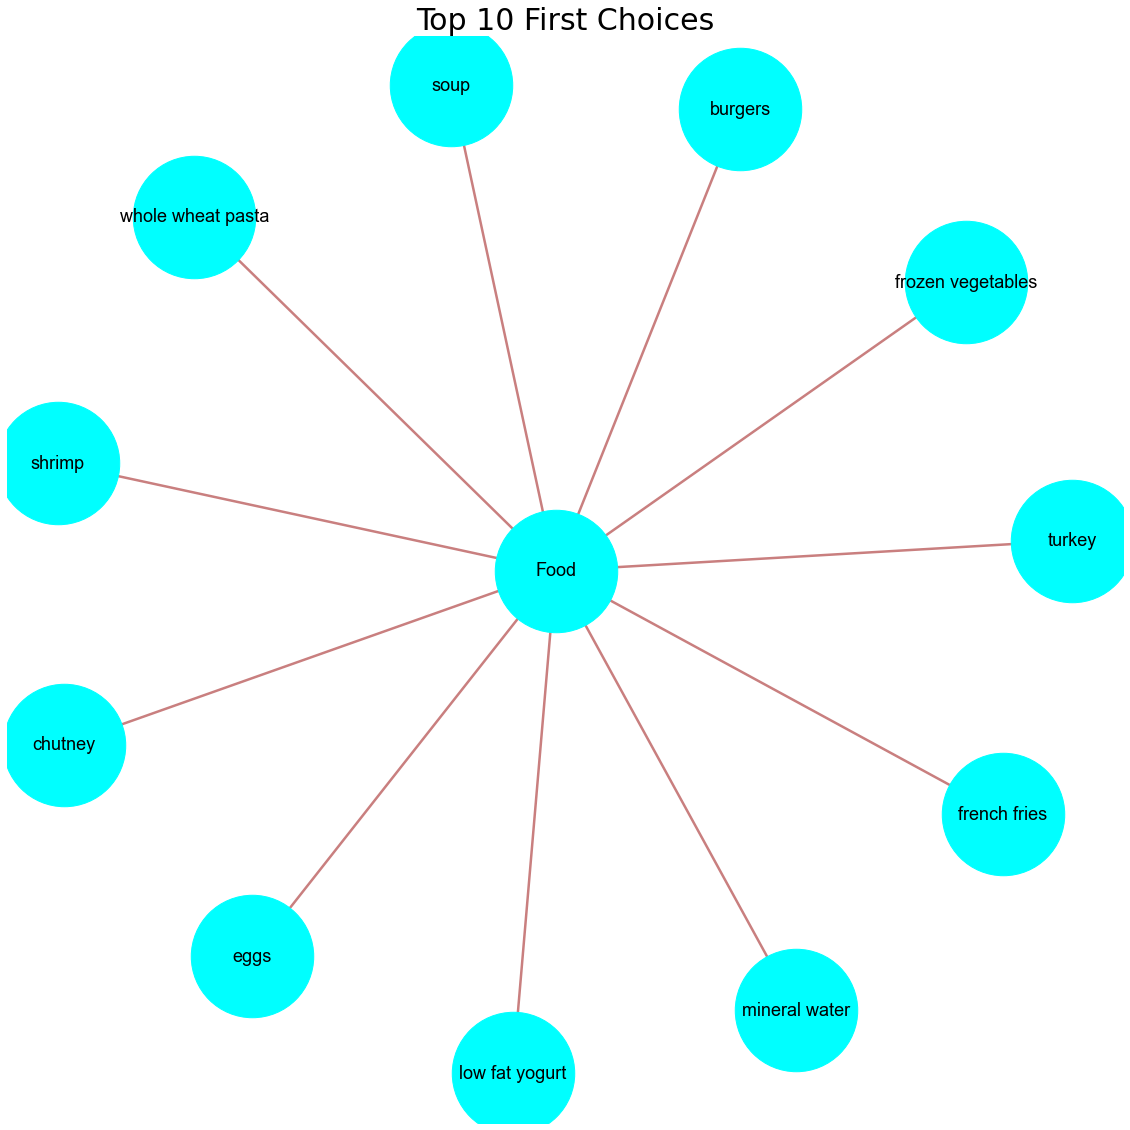

In [84]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(food)
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color ='cyan')
nx.draw_networkx_edges(food, pos, width = 2.5, alpha = 0.6, edge_color = 'Brown')
nx.draw_networkx_labels(food, pos, font_size = 18, font_family = 'arial')
plt.axis('off')
plt.grid()
plt.title('Top 10 First Choices', fontsize = 30)
plt.show()

In [85]:
data['secondchoice'] = 'Second Choice'
secondchoice = data.truncate(before = -1, after = 10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 1, edge_attr = True)

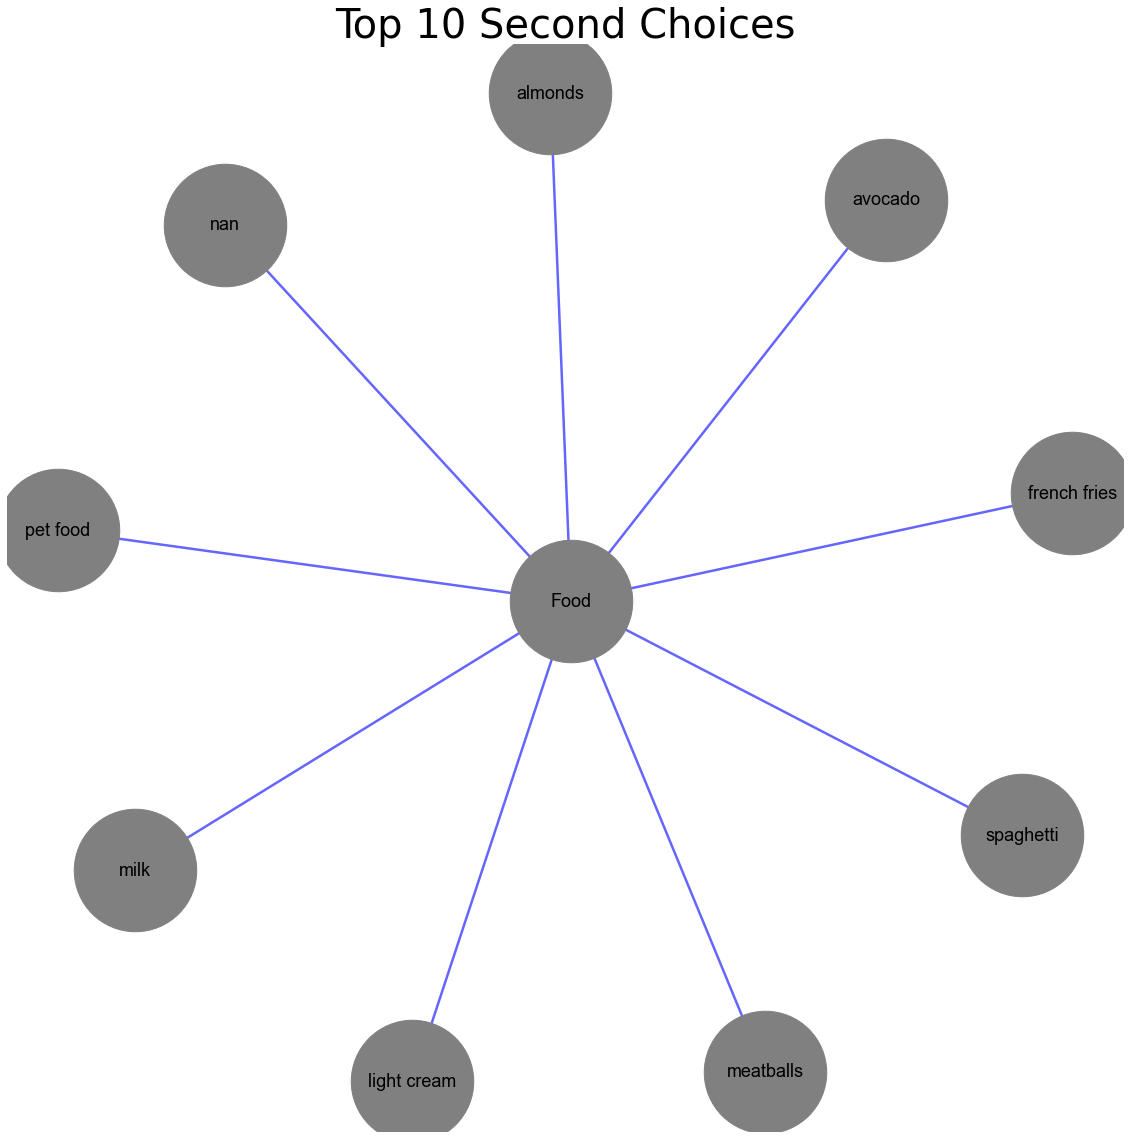

In [86]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color ="Grey")
nx.draw_networkx_edges(secondchoice, pos, width = 2.5, alpha = 0.6, edge_color = 'blue')
nx.draw_networkx_labels(secondchoice, pos, font_size = 18, font_family = 'arial')
plt.axis('off')
plt.grid()
plt.title('Top 10 Second Choices', fontsize = 40)
plt.show()

In [92]:
data['thirdchoice'] = 'Third Choice'
secondchoice = data.truncate(before = -1, after =10)
secondchoice = nx.from_pandas_edgelist(secondchoice, source = 'food', target = 2, edge_attr = True)

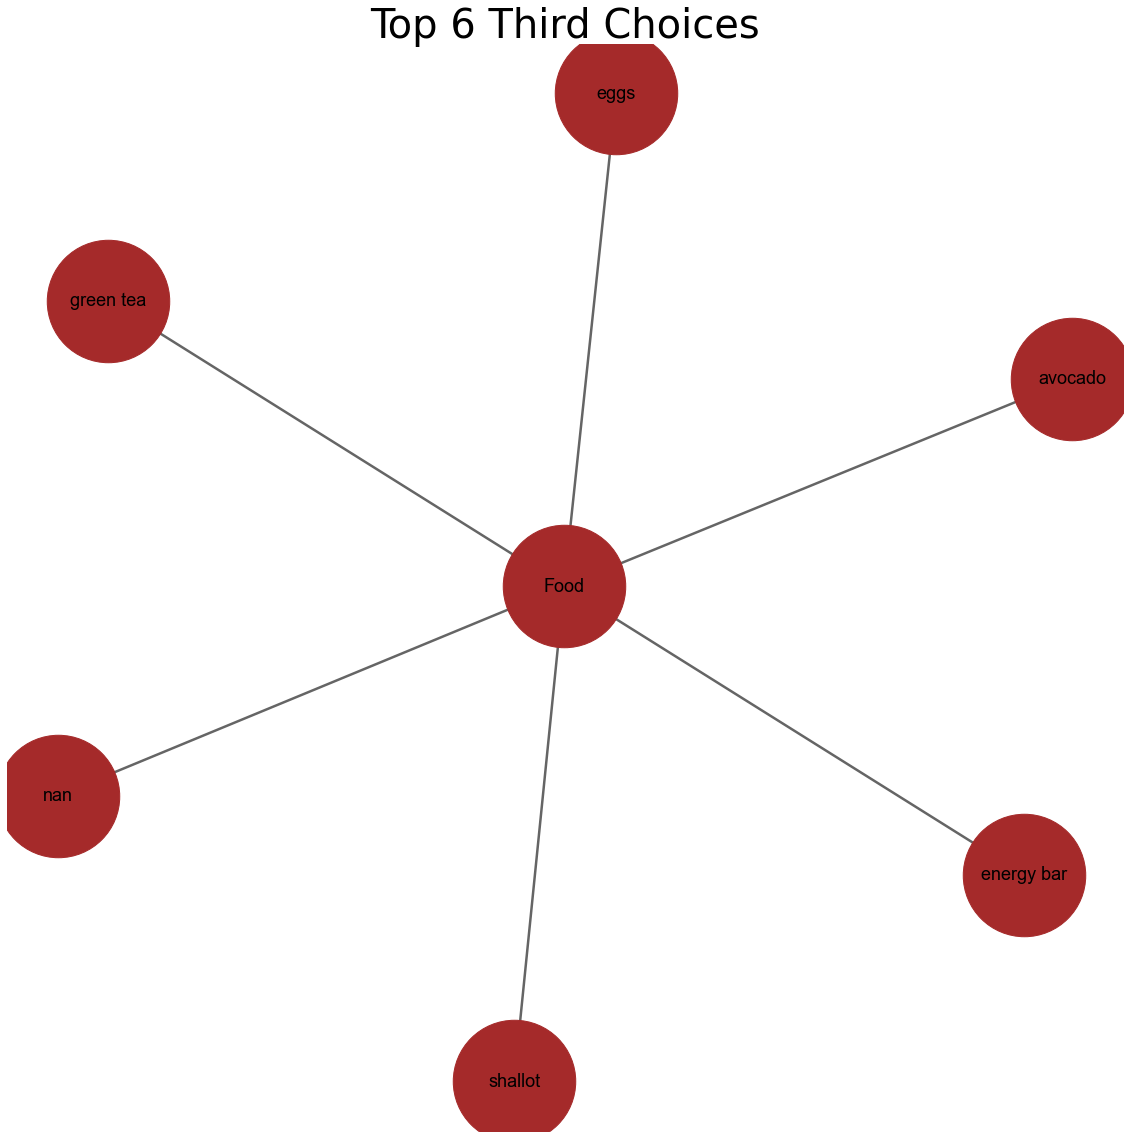

In [93]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (20, 20)
pos = nx.spring_layout(secondchoice)
nx.draw_networkx_nodes(secondchoice, pos, node_size = 15000, node_color = 'brown')
nx.draw_networkx_edges(secondchoice, pos, width = 2.5, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(secondchoice, pos, font_size = 18, font_family = 'arial')
plt.axis('off')
plt.grid()
plt.title('Top 6 Third Choices', fontsize = 40)
plt.show()

## Data Preprocessing

In [94]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
    trans.append([str(data.values[i,j]) for j in range(0, 20)])

# conveting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print(trans.shape)

(7501, 20)


In [95]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
data = te.fit_transform(trans)
data = pd.DataFrame(data, columns = te.columns_)

# getting the shape of the data
data.shape

(7501, 121)

In [115]:
import warnings
warnings.filterwarnings('ignore')

# getting correlations for 121 items would be messy 
# so let's reduce the items from 121 to 50

data = data.loc[:, list(y.index)]

# checking the shape
data.shape

(7501, 50)

In [116]:
data.head()

,mineral water,burgers,turkey,chocolate,frozen vegetables,spaghetti,shrimp,grated cheese,eggs,cookies,...,salmon,dessert wine,hot dogs,honey,cereals,candy bars,strawberries,oil,tomato sauce,yams
0,True,False,False,False,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori Algorithm for Prediction

In [117]:
frequent_itemsets = apriori(data, min_support = 0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
...,...,...,...
218,0.010132,"(mineral water, ground beef, eggs)",3
219,0.013065,"(mineral water, milk, eggs)",3
220,0.011065,"(mineral water, ground beef, milk)",3
221,0.010532,"(chocolate, eggs, spaghetti)",3


In [118]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
44,"(french fries, mineral water)",(spaghetti),0.033729,0.174110,0.010132,0.300395,2,1
33,(soup),(milk),0.050527,0.129583,0.015198,0.300792,1,1
34,"(mineral water, chocolate)",(spaghetti),0.052660,0.174110,0.015865,0.301266,2,1
28,(tomatoes),(spaghetti),0.068391,0.174110,0.020931,0.306043,1,1
0,(turkey),(mineral water),0.062525,0.238368,0.019197,0.307036,1,1
59,"(milk, spaghetti)",(chocolate),0.035462,0.163845,0.010932,0.308271,2,1
41,"(mineral water, frozen vegetables)",(milk),0.035729,0.129583,0.011065,0.309701,2,1
24,(turkey),(eggs),0.062525,0.179709,0.019464,0.311301,1,1
17,(low fat yogurt),(mineral water),0.076523,0.238368,0.023997,0.313589,1,1
25,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1,1


In [119]:
frequent_itemsets = apriori(data, min_support = 0.03, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [120]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
9,(milk),(spaghetti),0.129583,0.174110,0.035462,0.273663,1,1
4,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1
7,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1,1
6,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1,1
1,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1,1
8,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,1,1
5,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1,1


In [121]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.087188,(burgers),1
2,0.062525,(turkey),1
3,0.163845,(chocolate),1
4,0.095321,(frozen vegetables),1
5,0.174110,(spaghetti),1
6,0.071457,(shrimp),1
7,0.052393,(grated cheese),1
8,0.179709,(eggs),1
9,0.080389,(cookies),1


In [122]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2).iloc[:,:-3]
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values("confidence")

,antecedents,consequents,antecedent support,consequent support,support,confidence,antecedents_length,consequents_length
4,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1,1
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1,1
2,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1,1
5,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1,1
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1,1
3,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1,1
